# **Energy consumption measurement using RAPL Report**

**Course:** Elective course: Energy Consumption E2025\
**Author:** Eray Erkul  
**Date:** 19 November 2025  

---

**In this assignment, I will analyze the energy consumption of the cpu and memory (DRAM) using RAPL and stress-ng while getting powered by a power supply.**

**References:**
Mostly code and markdowns were used from the **"comparing samples from normal distrubution.ipynb"** and **"comparing two non-normal distrbutions by random sampling.ipynb"** on the moodle. The article, **"RAPL in Action: Experiences in Using RAPL for Power Measurements"** - [doi.org/10.1145/3177754](https://doi.org/10.1145/3177754) was also used.

**stress-ng - a tool to load and stress a computer system** - https://manpages.ubuntu.com/manpages/focal/man1/stress-ng.1.html

**"DETERMINATION OF SAMPLE SIZE AND SAMPLING METHODS IN APPLIED RESEARCH"** - DOI:10.24874/PES03.01.003.

Lastly **AI** was also used to give an overview of my project and if i had missed something from the requirements. Few code was used with AI and modified by me, to match with the needs i had. These places are noted as #AI.

## 1. Research questions and Hypothesis

## **1.1 Research Question**

**Overall Question:**  
Which software characteristic has more impact on energy consumption compared to CPU-intensive workloads?

**Precise Research Question:**  
Given equal execution time for both CPU and DRAM, do DRAM‑intensive workloads use less energy than CPU‑bound workloads?

---

### **1.2 Hypotheses** 

**Null Hypothesis (H₀):**  
There is **no significant difference** in energy consumption between DRAM heavey workloads and CPU-bound workloads.

**Alternative Hypothesis (H₁):**  
There is a **significant difference** in energy consumption. DRAM heavy workloads consume less energy than CPU-bound workloads.

To whether reject or not the null hypothesis, I need to use statistical tests. These tests will show whether my data is normally distributed or not. If the data is normally distributed, I can use a t-test or ANOVA to decide whether to reject the null hypothesis. If the data is not normally distributed, I can use a permutation test instead.


---

### **1.3 Variables**
**Independent variable:**  
The independent variable in this experiment is the stress tests for CPU and memory (DRAM). The memory stress code was adjusted to match the structure of the code used for the other classes.

**Dependent variable:**  
The dependent variable is the energy consumption that CPU and memory use during the test and is measured by using RAPL. 

**Choice of Dependent Variable**\
Memory (DRAM) was chosen because it stores data temporarily while programs are running. It is fast and can use a lot of energy under load, even with this fact I believe it uses less energy than the CPU.

**Controlled variables:**
All tests are conducted under the following controlled conditions:
- Hardware: All test PCs use identical hardwares.
- Operating system: All PCs run the same Linux and version (Ubuntu Server 24.04 LTS).
- Power and services: PCs are connected to a power supply, and background services are disabled.
- All executions were run at 20 seconds.
- Cooling and environment: Tests are done at similar device temperatures, on the same surface, and under similar surrounding conditions.
---

## **2. Methodology**

In this experiment, energy consumption was measured for both CPU-intensive and memory-intensive (DRAM) workloads using Intel’s Running Average Power Limit (RAPL) feature. RAPL provides accurate energy consumption data and directly from the CPU. The stress-ng tool was used to stress test which apply heavy load to the CPU and DRAM. Additionally, the memory test code was updated to match the structure of the code used for the other test classes.

**The features we need from RAPL are:**\
**CPU:** An estimation of power used by the cores\
**Package:** An estimation of energy consumed by the whole processor/socket.\
**Time:** How long it took for the measurement to run, in ms.

**Experimental setup:**
The experiment was performed on a Dell Latitude laptop with the following specifications:
- Intel® Core™ i5-8350U @ 1.70GHz
- System Memory: between 15 and 16 GB RAM
- Storage: 436 GB left - NVME.

Most background services were disabled during the stress tests, although the dbus service could not be turned off.



To determine the sample size for the experiment, Cochran’s formula is applied: $n = \frac{Z^2 * p * q}{e^2}$
- Z is the Z-score i.e conffidence level. (For a 95% confidence interval, the Z-score from the standard normal distribution is 1.96.)
- p is the estimated proportion of the population. (Since we do not have prior information about the data, we use 0.5 as a conservative estimate.)
- q is 1 - p
- and e is the desired margin of error (precision). (Chosen value is 0.05 which means that the result should be within 5% of the actual population.)

Cochran’s sample size formula helps researchers figure out how many participants or data points are needed for a study. 
For this study, a 95% confidence level will be used.

In [575]:
z = 1.96
p = 0.5
q = 1 - p
e = 0.05

n = (z**2 * p * q)/e**2
print(f"Calculated sample size for the study: {n}")

Calculated sample size for the study: 384.1599999999999


Based on Cochran's formula, at least 384 runs were required to ensure the sample size was large enough for a reliable analysis.

After connecting the laptop to a power supply, Stress-ng stress tests were performed in 400 times for both CPU and memory classes (400 data points for CPU and 400 data points for memory), with each execution time lasting 20 seconds.

**Controlled Setup:**
A controlled setup was not implemented in this experiment. The reason is that all tests were performed under the same stress conditions, and not in an idle condition.

The stress test results were saved in a CSV file. Only the energy consumption measurements of the CPU (energy measurements used only by the CPU cores), the package (PKG which is the total energy used by the whole processor/socket i.e. all the cores, integrated graphics and additionally the uncore components (memory controller, last level caches)) and execution time are included. Measurements from NN and NN2 are excluded. I will run tests for both CPU and memory classes and compare their CPU and PKG energy consumption over time.

To whether reject or not the null hypotheses, I must perform a statistical analysis

In [576]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math 
import random

Before starting to work on the data, i need to make sure that the data formatation is correct, for example, i need to change the ';' into a ','. To do this, using sep= will do the job.

In [577]:
data_CPU = pd.read_csv('cpu-stress-ng.csv', sep=r'[;,\s]+', engine='python', names=['test','PKG','CPU','time']) #AI was used here i.e. AI added sep=r'[;,\s]+', engine='python'
data_CPU

,test,PKG,CPU,time
0,cpu,780.842224,749.859436,20296.5
1,cpu,479.237854,450.172913,20398.4
2,cpu,445.622253,418.648560,20244.8
3,cpu,447.585815,415.841675,20418.0
4,cpu,447.605896,416.566711,20353.9
...,...,...,...,...
395,cpu,386.230713,353.864685,20516.5
396,cpu,373.332092,342.597961,20320.0
397,cpu,382.693298,351.696472,20525.8
398,cpu,388.489990,356.199036,20552.2


In [578]:
data_memory = pd.read_csv('memory-stress-ng.csv', sep=r'[;,\s]+', engine='python', names=['test','PKG','CPU','time'])
data_memory

,test,PKG,CPU,time
0,memory,484.963074,423.709290,23240.3
1,memory,446.409363,383.956543,23038.3
2,memory,468.358276,407.212402,23149.1
3,memory,468.924866,405.436584,23085.6
4,memory,483.161377,423.068176,23133.6
...,...,...,...,...
395,memory,439.955383,371.022034,23800.9
396,memory,239.430481,183.562012,23779.2
397,memory,420.123962,358.072510,22604.3
398,memory,448.154541,381.284973,23190.3


Then i will combine both dataframeworks by using merge (outer function).

In [579]:
concat_two_frameworks = pd.merge(data_CPU, data_memory, on='test', how='outer' )

concat_two_frameworks['PKG'] = concat_two_frameworks['PKG_x'].combine_first(concat_two_frameworks['PKG_y'])
concat_two_frameworks['CPU'] = concat_two_frameworks['CPU_x'].combine_first(concat_two_frameworks['CPU_y'])
concat_two_frameworks['time']= concat_two_frameworks['time_x'].combine_first(concat_two_frameworks['time_y'])

combined_df = concat_two_frameworks[['test','PKG','CPU','time']]
combined_df

,test,PKG,CPU,time
0,cpu,780.842224,749.859436,20296.5
1,cpu,479.237854,450.172913,20398.4
2,cpu,445.622253,418.648560,20244.8
3,cpu,447.585815,415.841675,20418.0
4,cpu,447.605896,416.566711,20353.9
...,...,...,...,...
795,memory,439.955383,371.022034,23800.9
796,memory,239.430481,183.562012,23779.2
797,memory,420.123962,358.072510,22604.3
798,memory,448.154541,381.284973,23190.3


**Normalization**\
When using stress-ng to stress test the classes, the result from these tests did not all run each execution same amount of time. This makes the comparison unfair because teoretically a longer execution time consumes more energy. To ensure a fair comparison across all measurements, I normalize the energy values to a fixed duration of 20 seconds.


In [580]:
combined_df.loc[:, "time"] = combined_df["time"] / 1000 # Convert time from milliseconds to seconds
combined_df.loc[:, "PKG"] = (combined_df["PKG"] / combined_df["time"]) * 20 
combined_df.loc[:, "CPU"] = (combined_df["CPU"] / combined_df["time"]) * 20
combined_df.loc[:, "time"] = (combined_df["time"] / combined_df["time"]) * 20


In [581]:
combined_df

,test,PKG,CPU,time
0,cpu,769.435345,738.905167,20.0
1,cpu,469.877887,441.380611,20.0
2,cpu,440.233792,413.586264,20.0
3,cpu,438.422779,407.328509,20.0
4,cpu,439.823224,409.323728,20.0
...,...,...,...,...
795,memory,369.696426,311.771432,20.0
796,memory,201.378079,154.388719,20.0
797,memory,371.720392,316.818048,20.0
798,memory,386.501719,328.831428,20.0


Now both PKG and CPU values are normalized, meaning they are an estimate of the energy each measurements might have consumed if the workload had run for exactly 20 seconds.

To acquire an overview about the data we can use describe() and make some plots about the data.

In [582]:
combined_df.describe()

,PKG,CPU,time
count,800.000000,800.000000,800.0
mean,73.825215,44.811902,20.0
std,8374.422700,7979.082195,0.0
min,-236488.331306,-225348.142824,20.0
25%,374.637678,326.138431,20.0
50%,382.958291,345.846773,20.0
75%,396.965594,354.765621,20.0
max,769.435345,738.905167,20.0


We can see at the min, that there are negative values within our dataset.

### **Overview of data**

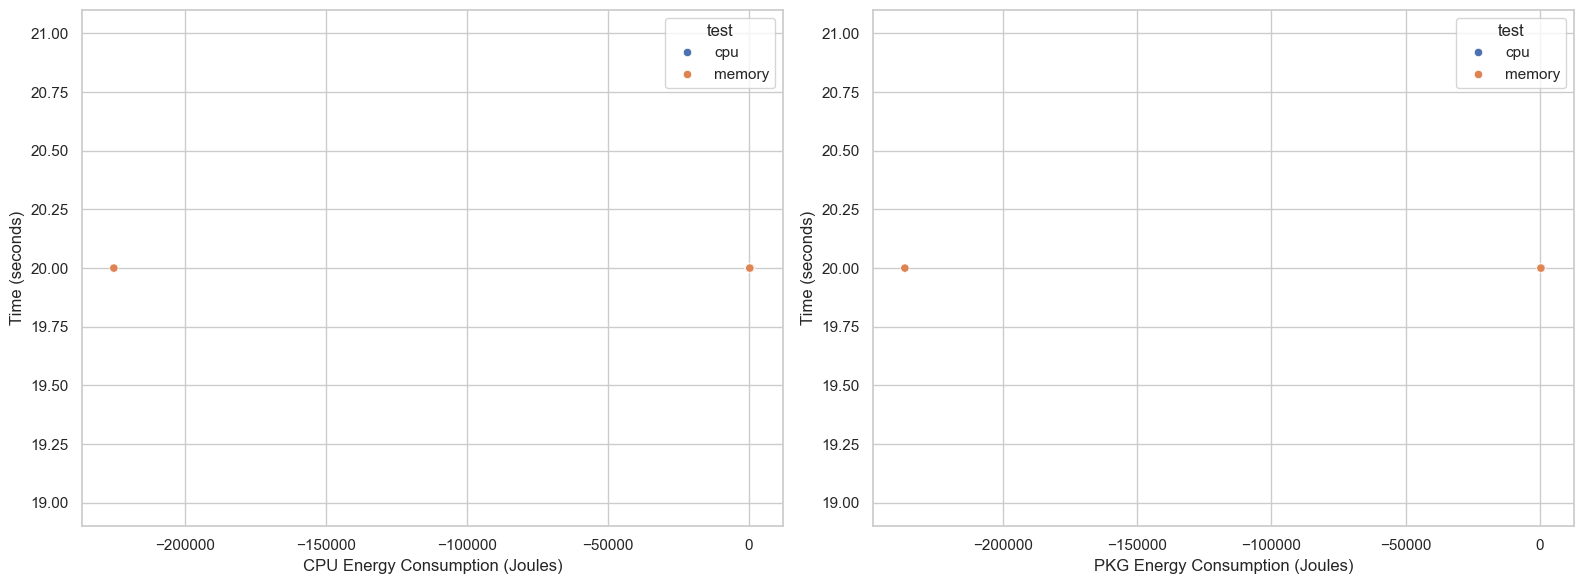

In [583]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))


# CPU scatterplot
sns.scatterplot(data=combined_df, hue='test', x='CPU', y='time', ax=axes[0])
axes[0].set_xlabel("CPU Energy Consumption (Joules)")
axes[0].set_ylabel("Time (seconds)")

# PKG scatterplot
sns.scatterplot(data=combined_df, hue='test', x='PKG', y='time', ax=axes[1])
axes[1].set_xlabel("PKG Energy Consumption (Joules)")
axes[1].set_ylabel("Time (seconds)")

plt.tight_layout()
plt.show()

The scatterplots illustrate that there are negative numbers and potential outliers. The scatterplots do not give much information about the data.

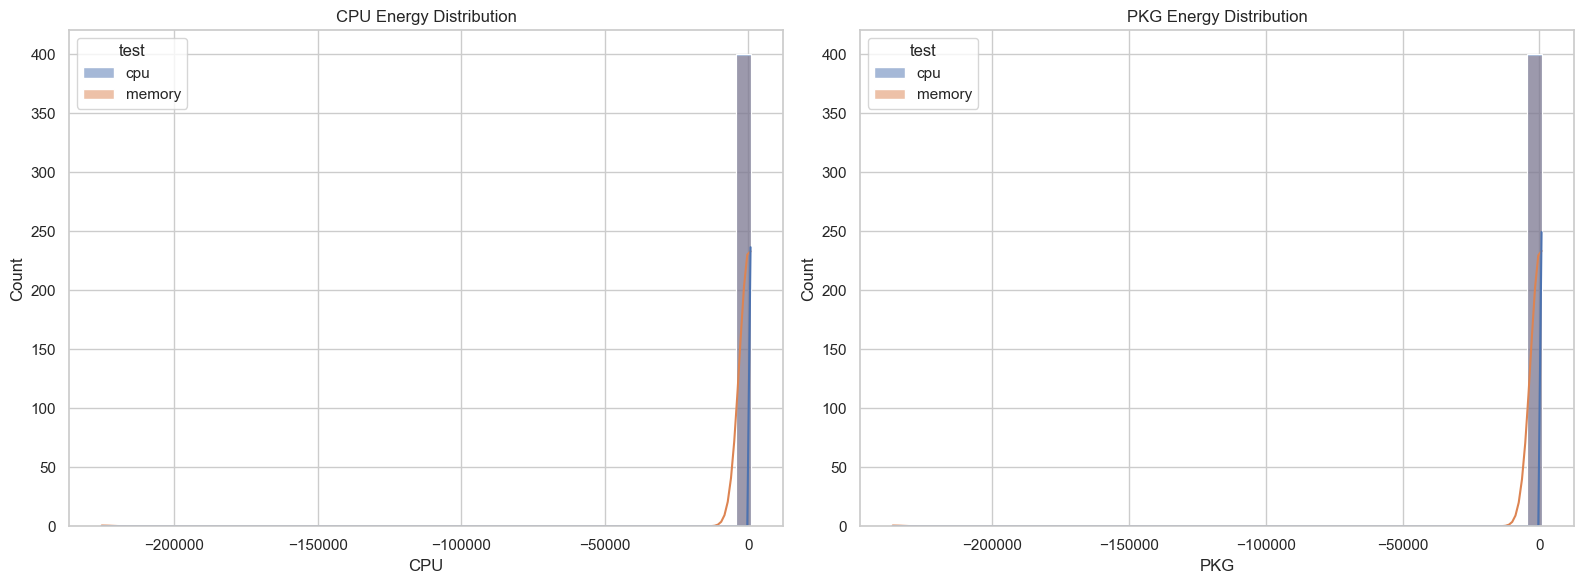

In [584]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# CPU histogram
sns.histplot(data=combined_df, hue='test', bins=45, kde=True, stat="count", x='CPU', ax=axes[0])
axes[0].set_title("CPU Energy Distribution")

# PKG histogram
sns.histplot(data=combined_df, hue='test', bins=45, kde=True, stat="count", x='PKG', ax=axes[1])
axes[1].set_title("PKG Energy Distribution")

plt.tight_layout()
plt.show()

The histograms show that both classes (specially memory) could be normally distributed and both classes show a long left skew.
Additionally, the histograms do also show, that the data contains negative numbers. Aside from these factors, the histograms do not provide any further information.

### **Negative values**

As mentioned earlier, the minimum values, scatterplot, and histogram indicate that, there are negative numbers and might have potential outliers, so they must be removed.
I will check for which group has negative values.

In [585]:
for col in ['PKG', 'CPU', 'time']:
    any_negatives = (data_CPU[col] < 0).any()
    print(f"Any negatives in '{col}'? {any_negatives}")

Any negatives in 'PKG'? False
Any negatives in 'CPU'? False
Any negatives in 'time'? False


In [586]:
for col in ['PKG', 'CPU', 'time']:
    any_negatives = (data_memory[col] < 0).any()
    print(f"Any negatives in '{col}'? {any_negatives}")

Any negatives in 'PKG'? True
Any negatives in 'CPU'? True
Any negatives in 'time'? False


The memory group has negative numbers, while the CPU group do not contain any negative values.

In [587]:
for col in ['PKG', 'CPU', 'time']:
    any_negatives = (combined_df[col] < 0).any()
    print(f"Any negatives in '{col}'? {any_negatives}")

Any negatives in 'PKG'? True
Any negatives in 'CPU'? True
Any negatives in 'time'? False


And the overall combined dataframe do of course also have negative numbers

Therefore I will remove all negative values

In [588]:
combined_df = combined_df[(combined_df['PKG'] >= 0) & (combined_df['CPU'] >= 0)]
combined_df.describe()

,PKG,CPU,time
count,798.000000,798.000000,798.0
mean,369.855209,327.165438,20.0
std,60.723434,64.613250,0.0
min,145.014263,100.176016,20.0
25%,374.676972,326.270917,20.0
50%,382.958291,345.891206,20.0
75%,396.941010,354.790843,20.0
max,769.435345,738.905167,20.0


In [589]:
for col in ['PKG', 'CPU', 'time']:
    any_negatives = (combined_df[col] < 0).any()
    print(f"Any negatives in '{col}'? {any_negatives}")

Any negatives in 'PKG'? False
Any negatives in 'CPU'? False
Any negatives in 'time'? False


### **Outliers**

Now that the negative numbers are removed, I can remove the outliers

One way to check for outliers is to use a boxplot

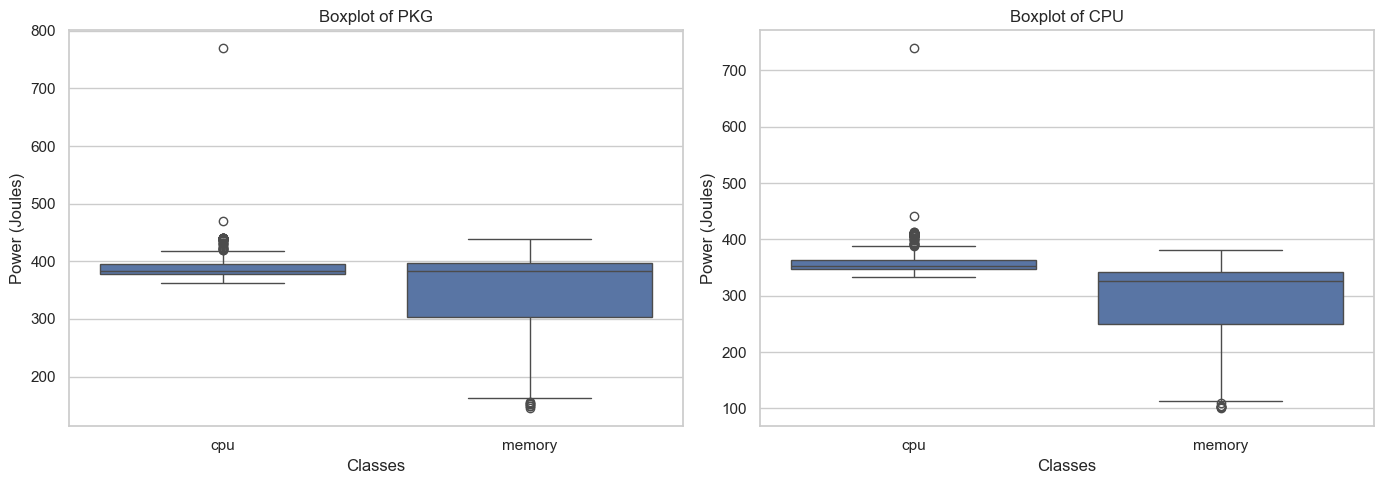

In [590]:
fig, axes = plt.subplots(1, 2, figsize=(14,5))

# Boxplot for PKG
sns.boxplot(x='test', y='PKG', data=combined_df, ax=axes[0])
axes[0].set_title("Boxplot of PKG")
axes[0].set_xlabel("Classes")
axes[0].set_ylabel("Power (Joules)")

# Boxplot for CPU
sns.boxplot(x='test', y='CPU', data=combined_df, ax=axes[1])
axes[1].set_title("Boxplot of CPU")
axes[1].set_xlabel("Classes")
axes[1].set_ylabel("Power (Joules)")

plt.tight_layout()
plt.show()

As seen on the figure, we do have a lot of outliers.

To remove these outliers, I will use the function code remove_outliers_quantile(), found on helper material on moodle. 

In [591]:
df_cpu = combined_df[combined_df['test'] == 'cpu']
df_memory = combined_df[combined_df['test'] == 'memory']

In [592]:

# Remove outliers from the initial data (per sample) 
# use quantile outliers when we do not have normal distributed data
def remove_outliers_quantile(data_series):
    data = data_series
    q75, q25 = data.quantile(q=0.75),data.quantile(q=0.25) # np.percentile(data.loc[:,data_column],[75,25])
    intr_qr = q75 - q25

    max = q75 + (1.5 * intr_qr)
    min = q25 - (1.5 * intr_qr)

    count_total = len(data)

    data = data[(data > min) & (data < max)]
    count_wo_outliers = len(data)

    outliers_count = count_total - count_wo_outliers
    print(f'number of outliers: {outliers_count} of {count_total} observations.')
    
    # remove outliers
    return data

df_cpu.loc[:,'CPU'] = remove_outliers_quantile(df_cpu['CPU'])
df_memory.loc[:,'CPU'] = remove_outliers_quantile(df_memory['CPU'])
df_cpu.loc[:,'PKG'] = remove_outliers_quantile(df_cpu['PKG'])
df_memory.loc[:,'PKG'] = remove_outliers_quantile(df_memory['PKG'])


number of outliers: 56 of 400 observations.
number of outliers: 7 of 398 observations.
number of outliers: 56 of 400 observations.
number of outliers: 7 of 398 observations.


The outliers have now been removed, but now, the daraframe will contain some NaNs.

In [593]:
df_cpu.isna().sum()

test     0
PKG     56
CPU     56
time     0
dtype: int64

In [594]:
df_memory.isna().sum()

test    0
PKG     7
CPU     7
time    0
dtype: int64

NaN must be removed.

In [595]:
df_cpu_clean = df_cpu.dropna(subset=['CPU', 'PKG', 'time'])
df_memory_clean = df_memory.dropna(subset=['CPU', 'PKG', 'time'])

cleaned_df = pd.concat([df_cpu_clean, df_memory_clean]).reset_index(drop=True)
cleaned_df


,test,PKG,CPU,time
0,cpu,416.348485,387.255259,20.0
1,cpu,418.584015,387.858171,20.0
2,cpu,417.446165,386.824541,20.0
3,cpu,411.045166,380.643952,20.0
4,cpu,408.180002,377.892001,20.0
...,...,...,...,...
730,memory,369.696426,311.771432,20.0
731,memory,201.378079,154.388719,20.0
732,memory,371.720392,316.818048,20.0
733,memory,386.501719,328.831428,20.0


Checking if there is any NaN.

In [596]:
cleaned_df.isna().sum()

test    0
PKG     0
CPU     0
time    0
dtype: int64

### **Overview of new data**

Now I can observe my data again with histogram.


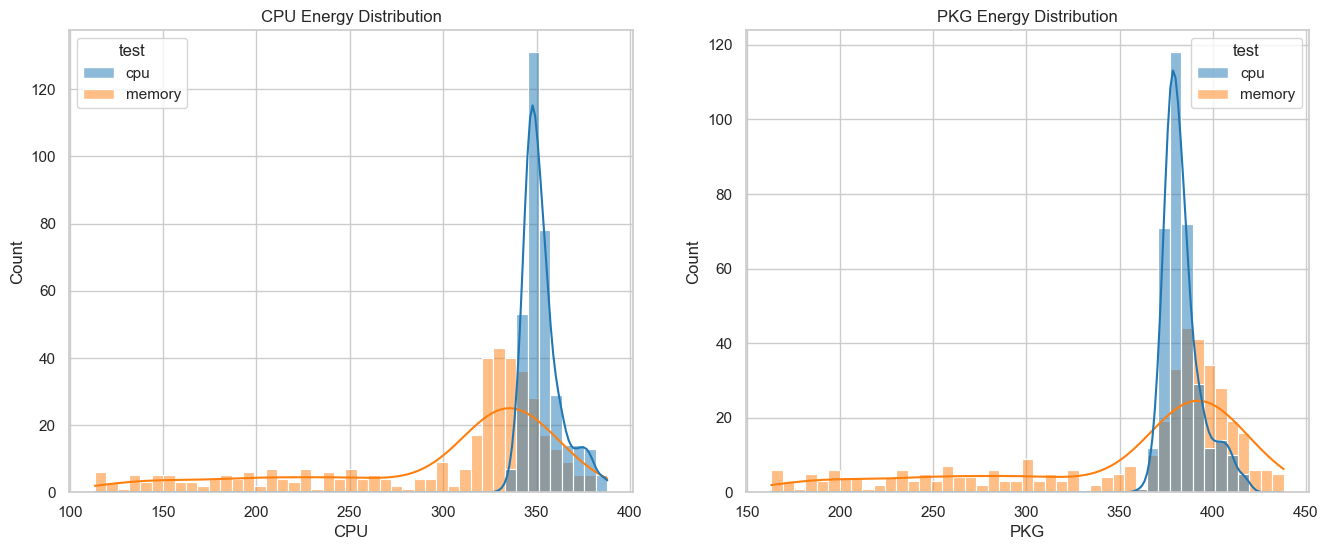

In [597]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# CPU histogram
sns.histplot(data=cleaned_df, hue='test', bins=45, kde=True, stat="count", x='CPU', palette='tab10', ax=axes[0])
axes[0].set_title("CPU Energy Distribution")

# PKG histogram
sns.histplot(data=cleaned_df, hue='test', bins=45, kde=True, stat="count", x='PKG', palette='tab10', ax=axes[1])
axes[1].set_title("PKG Energy Distribution")

plt.show()

As expected, the PKG should overall consume more energy compared to CPU, since PKG is data from the whole socket and the CPU is for the cores only.  

The histograms show that the CPU group, for both CPU and PKG energy consumption, is tightly grouped within a narrow range, with high counts at the upper end of the energy scale, indicating higher energy usage. The memory group on the other hand, has a much wider distribution with lower counts, meanintg memory group could consume less energy consumption.

The CPU group histograms do not appear normally distributed, because the histograms has one large peak and one smaller peak, making the graph asymmetrical. The Memory group histograms also do not appear normally distributed, reason being it has a long left skew.

Now I can test my data to see if my data is normal distributed or not and to wether reject or not to reject my hypothesis.

### **Statistical tests**

## Using Shapiro-Wilk Test to test for normality
First i wanna use Shapiro-Wilk Test to test whether my samples have a Gaussian distribution or not.

**Assumptions:**
Observations in each sample are independent and identically distributed (iid).

**Interpretation:**
- H0: the sample has a Gaussian distribution.
- H1: the sample does not have a Gaussian distribution.

In [598]:
# Example of the Shapiro-Wilk Normality Test
from scipy.stats import shapiro
data = cleaned_df[cleaned_df['test']=='cpu']['CPU']
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.884, p=0.000
Probably not Gaussian


In [599]:
# Example of the Shapiro-Wilk Normality Test
from scipy.stats import shapiro
data = cleaned_df[cleaned_df['test']=='cpu']['PKG']
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.894, p=0.000
Probably not Gaussian


In [600]:
# Example of the Shapiro-Wilk Normality Test
from scipy.stats import shapiro
data = cleaned_df[cleaned_df['test']=='memory']['CPU']
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.816, p=0.000
Probably not Gaussian


In [601]:
# Example of the Shapiro-Wilk Normality Test
from scipy.stats import shapiro
data = cleaned_df[cleaned_df['test']=='memory']['PKG']
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.811, p=0.000
Probably not Gaussian


All p-values are close to 0, which means I can reject the null hypothesis and therefore it might not be normally distributed.

To have further proofs, I will be testing my data using D’Agostino’s K^2 Test to test if the samples are normal distrubuted.

## D’Agostino’s K^2 Test
Tests whether a data sample has a Gaussian distribution.

**Assumptions**:
Observations in each sample are independent and identically distributed (iid).

**Interpretation:**
- H0: the sample has a Gaussian distribution.
- H1: the sample does not have a Gaussian distribution

In [602]:
# Example of the D'Agostino's K^2 Normality Test
from scipy.stats import normaltest
data = cleaned_df[cleaned_df['test']=='cpu']['CPU']
stat, p = normaltest(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=80.130, p=0.000
Probably not Gaussian


In [603]:
# Example of the D'Agostino's K^2 Normality Test
from scipy.stats import normaltest
data = cleaned_df[cleaned_df['test']=='cpu']['PKG']
stat, p = normaltest(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=74.717, p=0.000
Probably not Gaussian


In [604]:
# Example of the D'Agostino's K^2 Normality Test
from scipy.stats import normaltest
data = cleaned_df[cleaned_df['test']=='memory']['CPU']
stat, p = normaltest(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=64.918, p=0.000
Probably not Gaussian


In [605]:
# Example of the D'Agostino's K^2 Normality Test
from scipy.stats import normaltest
data = cleaned_df[cleaned_df['test']=='memory']['PKG']
stat, p = normaltest(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=65.528, p=0.000
Probably not Gaussian


Yet again I can reject the null hypothesis. The p-value is close to 0 and is probably not normally distributed.

Because the data is not normally distributed, I will perform tests for non-normal distributions.

# Permutation Test
To check if the difference between group's means is significant by randomly shuffling the data many times and seeing how often such differences happen by chance.

**Assumptions:** 
- Does not assume normality or equal variances. 

**Interpretation:** 
- H0: there is no difference between the groups. 
- H1: there is a difference between the groups.

In [606]:
# define the data source and how to separate the data (which test is program A and which is program B)
data = cleaned_df
data_column = 'CPU'         # The column name with the data that we want to compare
types_column_name = 'test'  # The column name with the data in it
programA = 'cpu'  # The category of data A
programB = 'memory'       # The category of data B

repetitions_of_random_sampling = 10000

# create a new dataframe with the interesting subset 
data_set=data[(data[types_column_name]==programA) | (data[types_column_name]==programB)]
data_set.reset_index()

# count the number of samples in each data set 
count_A = data[data[types_column_name]==programA][types_column_name].count()
count_B = data[data[types_column_name]==programB][types_column_name].count()
org_mean_diff = data[data[types_column_name]==programA][data_column].mean()-data[data[types_column_name]==programB][data_column].mean()
if count_A != count_B: print(f"Warning: The data original data sets do not have equally many elements: Data set A has {count_A} elements and Data set B has {count_B} elements")
                              
total = count_A+count_B
fact_r = math.factorial(total)

max_combinations = math.factorial(total) /(math.factorial(count_A) * math.factorial(total-count_A))
if max_combinations < repetitions_of_random_sampling: 
    print(f"Warning: The number of possible combinations when picking {count_A} elements from {total} elements is {max_combinations} and you have chosen {repetitions_of_random_sampling} repetitions, thus including some repetitions.")
                              
list_index = list(range(total))

mean_diffs_cpu = []
for i in range(repetitions_of_random_sampling):
    samples = random.sample(list_index,total)
    sampleA_index = samples[:count_A]
    sampleB_index = samples[count_A:]
    
    sampleA = data_set.iloc[sampleA_index]
    sampleB = data_set.iloc[sampleB_index]
    
    mean_diff = sampleA[data_column].mean()-sampleB[data_column].mean()
    mean_diffs_cpu.append(mean_diff)

In [607]:
# define the data source and how to separate the data (which test is program A and which is program B)
data = cleaned_df
data_column = 'PKG'         # The column name with the data that we want to compare
types_column_name = 'test'  # The column name with the data in it
programA_cpu = 'cpu'  # The category of data A
programB_memory = 'memory'       # The category of data B

repetitions_of_random_sampling = 10000

# create a new dataframe with the interesting subset 
data_set=data[(data[types_column_name]==programA) | (data[types_column_name]==programB)]
data_set.reset_index()

# count the number of samples in each data set 
count_A = data[data[types_column_name]==programA][types_column_name].count()
count_B = data[data[types_column_name]==programB][types_column_name].count()
org_mean_diff = data[data[types_column_name]==programA][data_column].mean()-data[data[types_column_name]==programB][data_column].mean()
if count_A != count_B: print(f"Warning: The data original data sets do not have equally many elements: Data set A has {count_A} elements and Data set B has {count_B} elements")
                              
total = count_A+count_B
fact_r = math.factorial(total)

max_combinations = math.factorial(total) /(math.factorial(count_A) * math.factorial(total-count_A))
if max_combinations < repetitions_of_random_sampling: 
    print(f"Warning: The number of possible combinations when picking {count_A} elements from {total} elements is {max_combinations} and you have chosen {repetitions_of_random_sampling} repetitions, thus including some repetitions.")
                              
list_index = list(range(total))

mean_diffs_pkg = []
for i in range(repetitions_of_random_sampling):
    samples = random.sample(list_index,total)
    sampleA_index = samples[:count_A]
    sampleB_index = samples[count_A:]
    
    sampleA = data_set.iloc[sampleA_index]
    sampleB = data_set.iloc[sampleB_index]
    
    mean_diff = sampleA[data_column].mean()-sampleB[data_column].mean()
    mean_diffs_pkg.append(mean_diff)

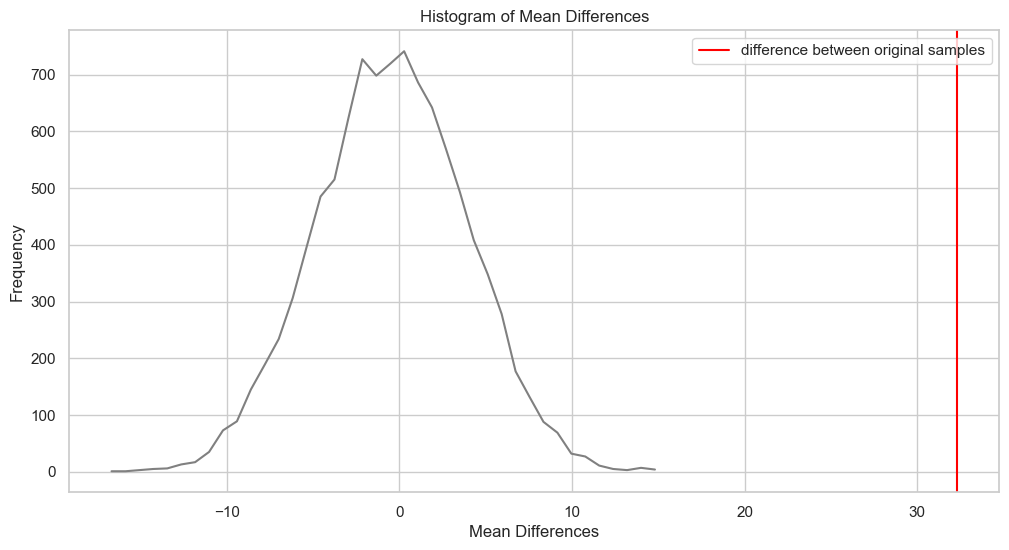

In [608]:
# evaluate the histogram
fig, ax = plt.subplots(figsize=(12, 6))
values, base = np.histogram(mean_diffs_cpu, bins=40)
plt.plot(base[:-1], values, c='gray')
# a red line indicating the original difference between the averages of the original samples 
plt.axvline(x = org_mean_diff, color = 'red', label = 'difference between original samples')

ax.set_xlabel('Mean Differences')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Mean Differences')
ax.legend()

plt.show()

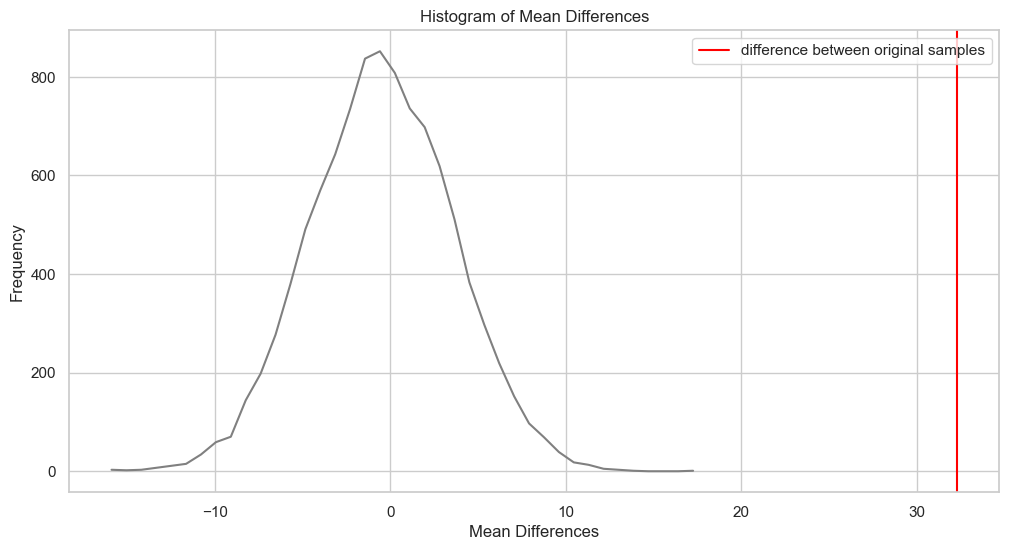

In [609]:
# evaluate the histogram
fig, ax = plt.subplots(figsize=(12, 6))
values, base = np.histogram(mean_diffs_pkg, bins=40)
plt.plot(base[:-1], values, c='gray')
# a red line indicating the original difference between the averages of the original samples 
plt.axvline(x = org_mean_diff, color = 'red', label = 'difference between original samples')

ax.set_xlabel('Mean Differences')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Mean Differences')
ax.legend()

plt.show()

Both graphs show that the red line is outside the gray histogram of mean differences.

In [610]:
empirical_p_cpu = np.count_nonzero(pd.Series(mean_diffs_cpu) <= org_mean_diff) / repetitions_of_random_sampling
empirical_p_memory = np.count_nonzero(pd.Series(mean_diffs_pkg) <= org_mean_diff) / repetitions_of_random_sampling
print(f"Empirical p-value for CPU: {empirical_p_cpu} and for Memory: {empirical_p_memory}")

Empirical p-value for CPU: 1.0 and for Memory: 1.0


In [611]:
print(f"If the empirical p-value is 1.0, it means that all of the {repetitions_of_random_sampling} permuted samples " +
      f"produced a difference of {org_mean_diff} or more extreme. This suggests that the observed difference " +
      "is entirely consistent with the null hypothesis. Therefore, we do not reject the null hypothesis.")


If the empirical p-value is 1.0, it means that all of the 10000 permuted samples produced a difference of 32.29566714104743 or more extreme. This suggests that the observed difference is entirely consistent with the null hypothesis. Therefore, we do not reject the null hypothesis.


##  **3. Interpretation and Discussion**

**Comfounding variables:**
- Small differences in temperature or how well the computer was cooled could have affected how much power the CPU or memory used.
- dbus service was not disabled and might have an affect.
- Ran make measure but canceled it before a test could stop, which might have added more tests to the raw data, resulting in more chunked data.


The histograms show that the cpu group workloads use more energy as seen by the narrow and high peaks at the the level for maximum energy consumption. The memory workloads are more distributed and generally use less energy, having lower peaks. None of the histograms appear as normally distributed.  


| Feature   | Plot - Normality                     | Shapiro-Wilk (Normal?)       | D'Agostino’s K² (Normal?) |
|-----------|-------------------------------------|------------------------------|---------------------------|
| CPU    | Not normal distribution  | 0 out of 2                   | 0 out of 2                |
| PKG | Do not appear as normally distributed | 0 out of 2                   | 0 out of 2                |

Both statistical tests indicate that the data is not normally distributed.

In the permutation test, the gray histogram show what kind of differences in means I would expect if there was no real difference between gpu and memory means, most differences are close to zero. The red line is the actual difference that was found. Since it is far away from the gray bars, it probably did not happen just by chance. This means there is a strong evidence that cpu and memory are genuinely different, so I can reject the null hypothesis since there is probably no difference between their means.

The empirical p-value for both groups is 1.0, indicating there is no evidence against normality for either cpu or memory data. Since all other test results "disagreeing" with this empirical p-value, I will not consider the empirical p-value as reliable.


## **4. Validity:**


**Comfounding variables**:
- Data from the memory stress test contains negative numbers.
- Small differences in temperature or how well the computer was cooled could have affected how much power the CPU or memory used. The CPU test was executed on a table while the memory test was on a bed. 
- dbus service was not disabled and might have an affect.


### **4.1 Internal Validity**

Not all runs were done at the same time, so things like CPU temperature or other programs running in the background could have affected the energy measurements. Even after normalizing energy to 20 seconds, measurements can still vary due to factors such as CPU temperature (which can affect performance and power use), background processes consuming CPU or memory power, and CPU frequency scaling (meaning the CPU automatically changes its clock speed (frequency) and voltage up or down based on workload aiming to save energy).

Some hardware settings, such as screen brightness were not minimized or disabled, meaning the screen was on throughout the tests, which could have impacted the results. Additionally, the specific hardware and software used in this experiment have a influence on the outcomes. Newer hardware components and updated software (including operating systems and packages installed) tend to be more energy efficient than those that was used in this experiment.

### **4.2 External Validity**

Our experiment was run on a laptop, this way the results might not be the same if the experiment was conducted on other devices like phones, servers or other types of devices. Laptops are must stronger and well built compared to a mobile device, because they have different cooling systems, hardware performance, and energy use.

Environmental factors do also have an impact, such as surrounding temperature, how well the laptop cools, and the general condition of the laptop. These factors can influence the energy measurements. These things were not fully controlled. For example, not all laptops were placed on the same type of surface, had the same temperature around them, or had brand-new hardware.

RAPL only measures the energy used by the CPU and memory, among other things. It does not measure parts like an external GPU. Because of that, the outcome do not show the laptop’s actual total energy use. Also, stress-ng is made to push the computer at its limits and not to act like being used in a normal everyday usage, so the test does not fully represent real-world usage.

## **5. Reflection:**

In this assignment, I learned how to measure and analyze energy consumption in laptops running at their limits using RAPL.

One thing that confused me at the beginning, was why I could not run stress-ng for memory. The code did not look similar to the other classes. so I modified the code so it matched the structure of the other classes. However, I ended up getting negative values in my memory measurements. This might be because I changed something incorrectly in the stress-ng memory file, or it could simply be anomalies or errors in the measurement process.

I also struggled with getting my laptop online and ran into several issues along the way. I even had to switch to a different computer at one point because my laptop never got the connection to work. Later, I discovered that during the Linux installation, it was actually possible to select and connect to a network. Once I did that, I was finally able to get internet access on my laptop.
